In [2]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import waipy

#from wavelib import *  ## izpeti pirmdien!!!

In [3]:

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

def correctNumpyReadData(data):
    correctedData = list()
    for d in data:
        correctedData.append(d[0])
    return np.array(correctedData)

In [6]:
file = "/home/janis/Documents/workspace-sts/DataProcessingForMaserObservation/monitoring/cepa.txt"

data = np.fromfile(file, dtype="float64", count=-1, sep=" ").reshape((file_len(file),6))
print( pywt.wavelist('gaus'))
x = correctNumpyReadData(data[:, [0]])
y = correctNumpyReadData(data[:, [4]])

['gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8']


256 256


/home/janis/.local/lib/python3.6/site-packages/numpy-1.16.0.dev0+unknown-py3.6-linux-x86_64.egg/numpy/core/numeric.py:528: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


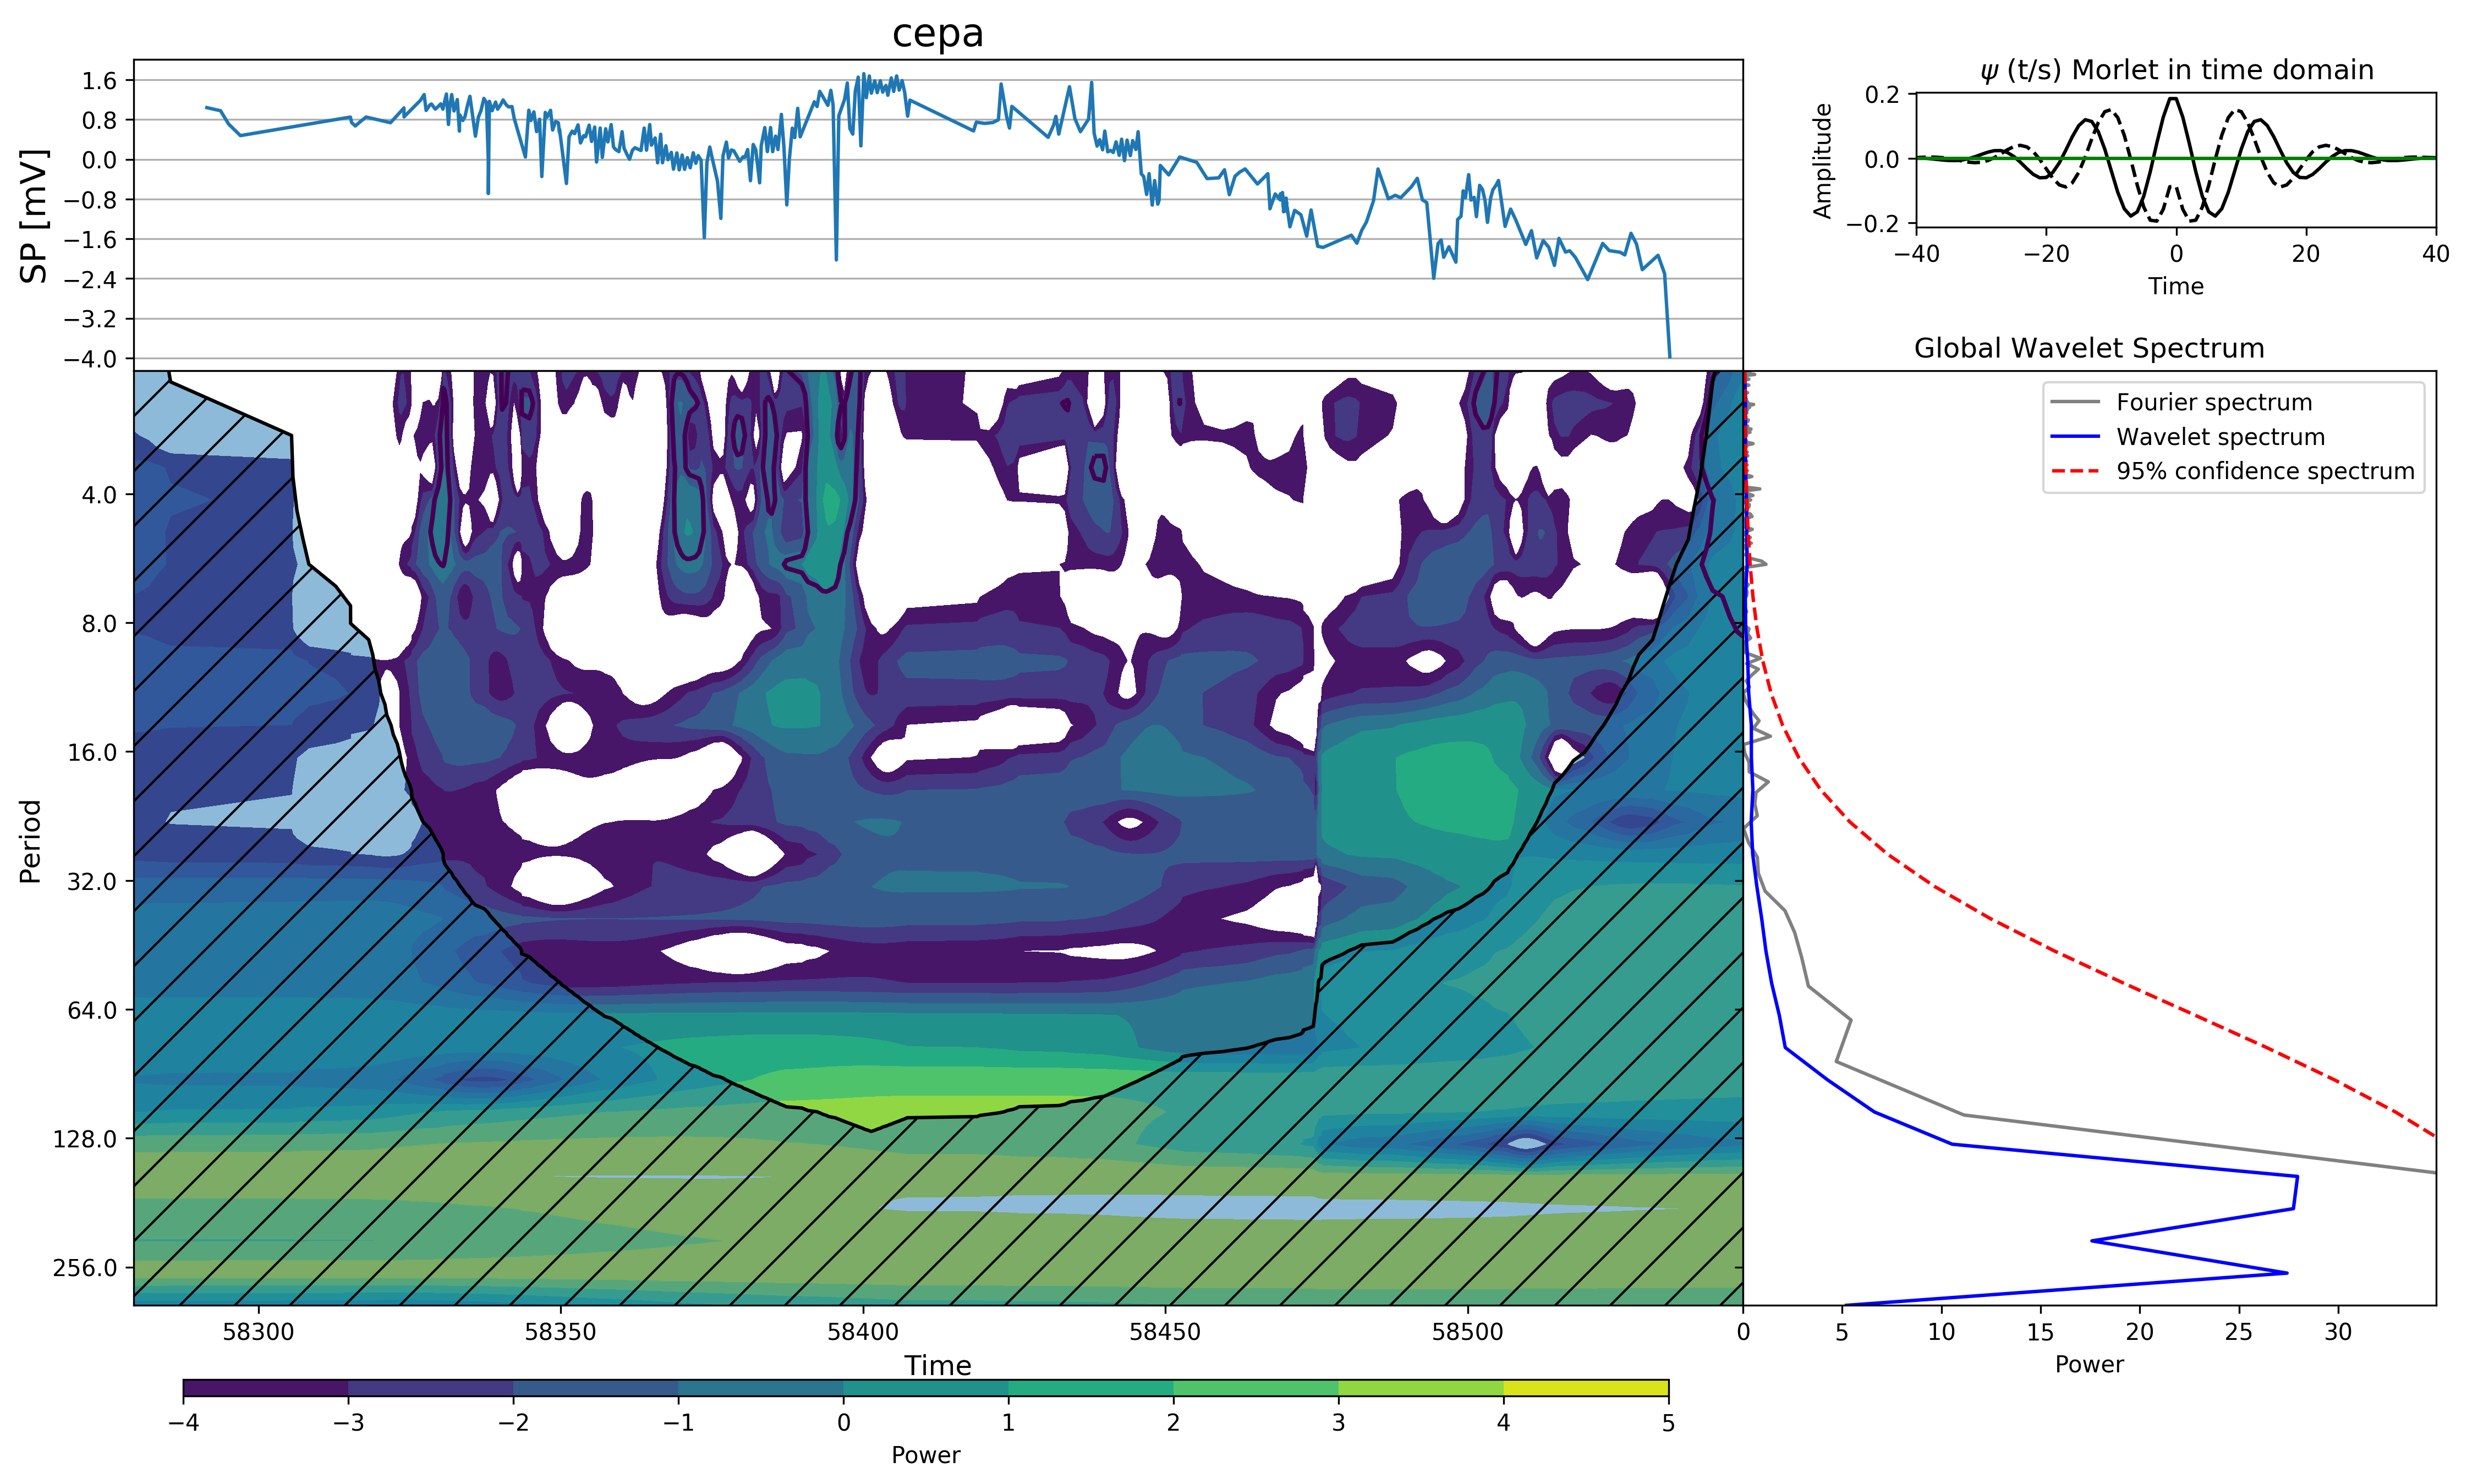

In [7]:
data = np.array([x,y])
data_norm = waipy.normalize(y)
alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]
result = waipy.cwt(data_norm, 1, 1, 0.25, 2, 4/0.25, alpha, 6, mother='Morlet', name="morlel2")
waipy.wavelet_plot("cepa", x, data_norm, 0.03125, result)